In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,62
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
np.mean(data)

CustomerID    105.000000
Age            40.229665
Income         64.282297
Spending       55.980861
dtype: float64

In [5]:
data.median()

CustomerID    105.0
Age            36.0
Income         62.0
Spending       52.0
dtype: float64

In [6]:
np.std(data)

CustomerID    60.332413
Age           16.599270
Income        35.587909
Spending      35.003617
dtype: float64

In [7]:
data.describe()

,CustomerID,Age,Income,Spending
count,209.000000,209.000000,209.000000,209.000000
mean,105.000000,40.229665,64.282297,55.980861
std,60.477268,16.639124,35.673354,35.087660
min,1.000000,5.000000,10.000000,0.000000
25%,53.000000,29.000000,42.000000,40.000000
50%,105.000000,36.000000,62.000000,52.000000
75%,157.000000,49.000000,78.000000,74.000000
max,209.000000,95.000000,300.000000,407.000000


## Visualizing Outliers using box plot

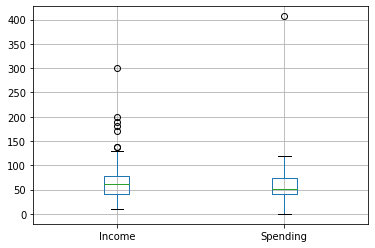

In [8]:
data.boxplot(column=['Income', 'Spending'])

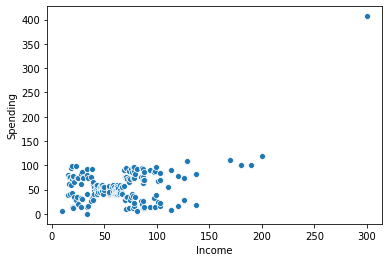

In [9]:
sns.scatterplot(x = 'Income', y = 'Spending', data = data)

# IQR method

In [10]:
datax = np.sort(data['Income'].values)
datay = np.sort(data['Spending'].values)

In [11]:
q1x, q3x = np.percentile(datax, [25, 75])
q1y, q3y = np.percentile(datay, [25, 75])

In [12]:
iqrx = q3x - q1x
iqry = q3y - q1y

In [13]:
lower_boundx = q1x - (1.5 * iqrx)
upper_boundx = q3x + (1.5 * iqrx)

lower_boundy = q1y - (1.5 * iqry)
upper_boundy = q3y + (1.5 * iqry)

## Income column Outlier Range

In [14]:
print("Lower Bound = ", lower_boundx)
print("Upper Bound = ", upper_boundx)

Lower Bound =  -12.0
Upper Bound =  132.0


## Spending column Outlier Range

In [15]:
print("Lower Bound = ", lower_boundy)
print("Upper Bound = ", upper_boundy)

Lower Bound =  -11.0
Upper Bound =  125.0


In [16]:
outliersx = []
outliersy = []

In [17]:
for i in datax:
    if i > upper_boundx or i < lower_boundx:
        outliersx.append(i)

In [18]:
for i in datay:
    if i > upper_boundy or i < lower_boundy:
        outliersy.append(i)

In [19]:
print("Outliers for Income Column = ", outliersx)
print("Outliers for Spending Column = ", outliersy)

Outliers for Income Column =  [137, 137, 170, 180, 190, 200, 300]
Outliers for Spending Column =  [407]


In [20]:
data['outliers'] = np.where(data['Income'].isin(outliersx) | data['Spending'].isin(outliersy), 1, 0)

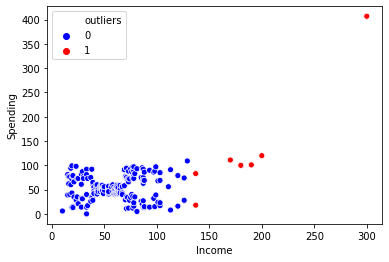

In [21]:
sns.scatterplot(x = 'Income', y = 'Spending', data = data, hue=data['outliers'], palette=['blue', 'red'])

# Z score method

In [22]:
datax = np.sort(data['Income'].values)
datay = np.sort(data['Spending'].values)

In [23]:
print(datax[0:7])
print(datay[0:7])

[10 15 15 16 16 17 17]
[ 0  5  6  8 11 12 12]


In [24]:
def detect_outliers(data):
    outliers=[]
    threshold=3

    mean = np.mean(data)
    std =np.std(data)


    for i in data:
          z_score= (i-mean)/std
          if np.abs(z_score) >threshold:
             outliers.append(i)
    return outliers

In [25]:
outliers_Income=detect_outliers(datax)
outliers_Income

[180, 190, 200, 300]

In [26]:
outliers_Spending=detect_outliers(datay)
outliers_Spending

[407]

In [27]:
data['outliers'] = np.where(data['Income'].isin(outliers_Income) | data['Spending'].isin(outliers_Spending), 1, 0)

In [28]:
data.head()

,CustomerID,Genre,Age,Income,Spending,outliers
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,62,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [29]:
data[data['outliers'] == 1]

,CustomerID,Genre,Age,Income,Spending,outliers
200,201,Male,90,180,100,1
201,202,Male,92,190,101,1
202,203,Female,95,200,120,1
208,209,Female,83,300,407,1
